In [18]:
# Import libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt

### Exploring structure of data

In [9]:
deathrate = pd.read_csv('deathrate.csv').iloc[:, 1:]
deathrate.head()

,Year,County,FIPS,Deathrate,Population,Poverty
0,1999,"Abbeville County, SC",45001,1,25921,3257.0
1,1999,"Acadia Parish, LA",22001,7,58762,12461.0
2,1999,"Accomack County, VA",51001,5,37614,6107.0
3,1999,"Ada County, ID",16001,7,294292,24964.0
4,1999,"Adair County, IA",19001,1,8298,697.0


In [10]:
deathrate.describe()

,Year,FIPS,Deathrate,Population,Poverty
count,50164.000000,50164.000000,50164.000000,5.016400e+04,5.015300e+04
mean,2006.499522,30443.254685,8.437086,9.557492e+04,1.281085e+04
std,4.609957,15121.848992,5.248425,3.074605e+05,4.788546e+04
min,1999.000000,1001.000000,1.000000,5.500000e+01,0.000000e+00
25%,2002.000000,19003.000000,5.000000,1.117100e+04,1.609000e+03
50%,2006.000000,29183.000000,7.000000,2.547300e+04,3.746000e+03
75%,2010.000000,45085.000000,11.000000,6.511125e+04,8.882000e+03
max,2014.000000,56045.000000,20.000000,1.011670e+07,1.873522e+06


In [11]:
deathrate.dtypes

Year            int64
County         object
FIPS            int64
Deathrate       int64
Population      int64
Poverty       float64
dtype: object

In [13]:
deathrate.shape

(50164, 6)

### Splitting `County` column into `County` and `State` columns 

In [16]:
deathrate[['County', 'State']] = deathrate['County'].str.split(',', expand=True)

In [17]:
deathrate

,Year,County,FIPS,Deathrate,Population,Poverty,State
0,1999,Abbeville County,45001,1,25921,3257.0,SC
1,1999,Acadia Parish,22001,7,58762,12461.0,LA
2,1999,Accomack County,51001,5,37614,6107.0,VA
3,1999,Ada County,16001,7,294292,24964.0,ID
4,1999,Adair County,19001,1,8298,697.0,IA
...,...,...,...,...,...,...,...
50159,2014,Yuma County,4027,15,203247,44112.0,AZ
50160,2014,Yuma County,8125,9,10202,1394.0,CO
50161,2014,Zapata County,48505,13,14319,4654.0,TX
50162,2014,Zavala County,48507,15,12267,3672.0,TX


### Data Viz and tables

<AxesSubplot:xlabel='Year'>

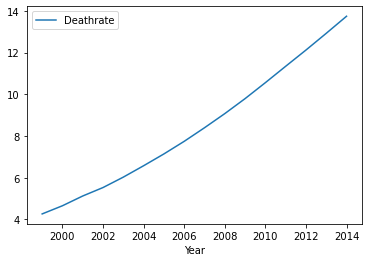

In [33]:
# deathrate.groupby('Year')[['Deathrate', 'Poverty']].mean().plot(legend=True)
deathrate.groupby('Year')['Deathrate'].mean().plot(legend=True)

Above is a simple graph of the mean deathrate by year. There has definitely been an increase from 1999 to 2014.

<AxesSubplot:xlabel='Year'>

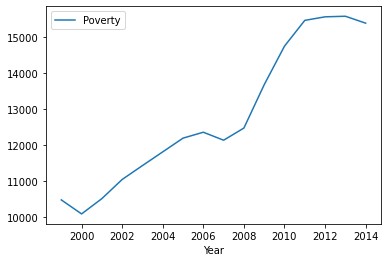

In [77]:
deathrate.groupby('Year')['Poverty'].mean().plot(legend=True)

Poverty also increased from 1999 to 2014, but not at the same rate as the death rates.

In [79]:
deathrate.groupby('County')['Deathrate'].mean().sort_values(ascending = False)

County
Rio Arriba County    20.0000
Baltimore city       19.9375
Mingo County         19.9375
Wolfe County         19.7500
Breathitt County     19.7500
                      ...   
Loving County         1.0000
Arthur County         1.0000
Borden County         1.0000
Slope County          1.0000
Frontier County       1.0000
Name: Deathrate, Length: 1869, dtype: float64

In [55]:
top5_mean_drate = deathrate.groupby('County')['Deathrate'].mean().sort_values(ascending = False).index[:5]
deathrate[deathrate['County'].isin(top5_mean_drate)]

,Year,County,FIPS,Deathrate,Population,Poverty,State
122,1999,Baltimore city,24510,19,657441,116916.0,MD
265,1999,Breathitt County,21025,17,16087,4511.0,KY
1929,1999,Mingo County,54059,19,29098,7144.0,WV
2421,1999,Rio Arriba County,35039,20,40826,7862.0,NM
3082,1999,Wolfe County,21237,17,6987,1945.0,KY
...,...,...,...,...,...,...,...
47151,2014,Baltimore city,24510,20,622793,139782.0,MD
47294,2014,Breathitt County,21025,20,13409,4340.0,KY
48957,2014,Mingo County,54059,20,25716,7163.0,WV
49449,2014,Rio Arriba County,35039,20,39777,9503.0,NM


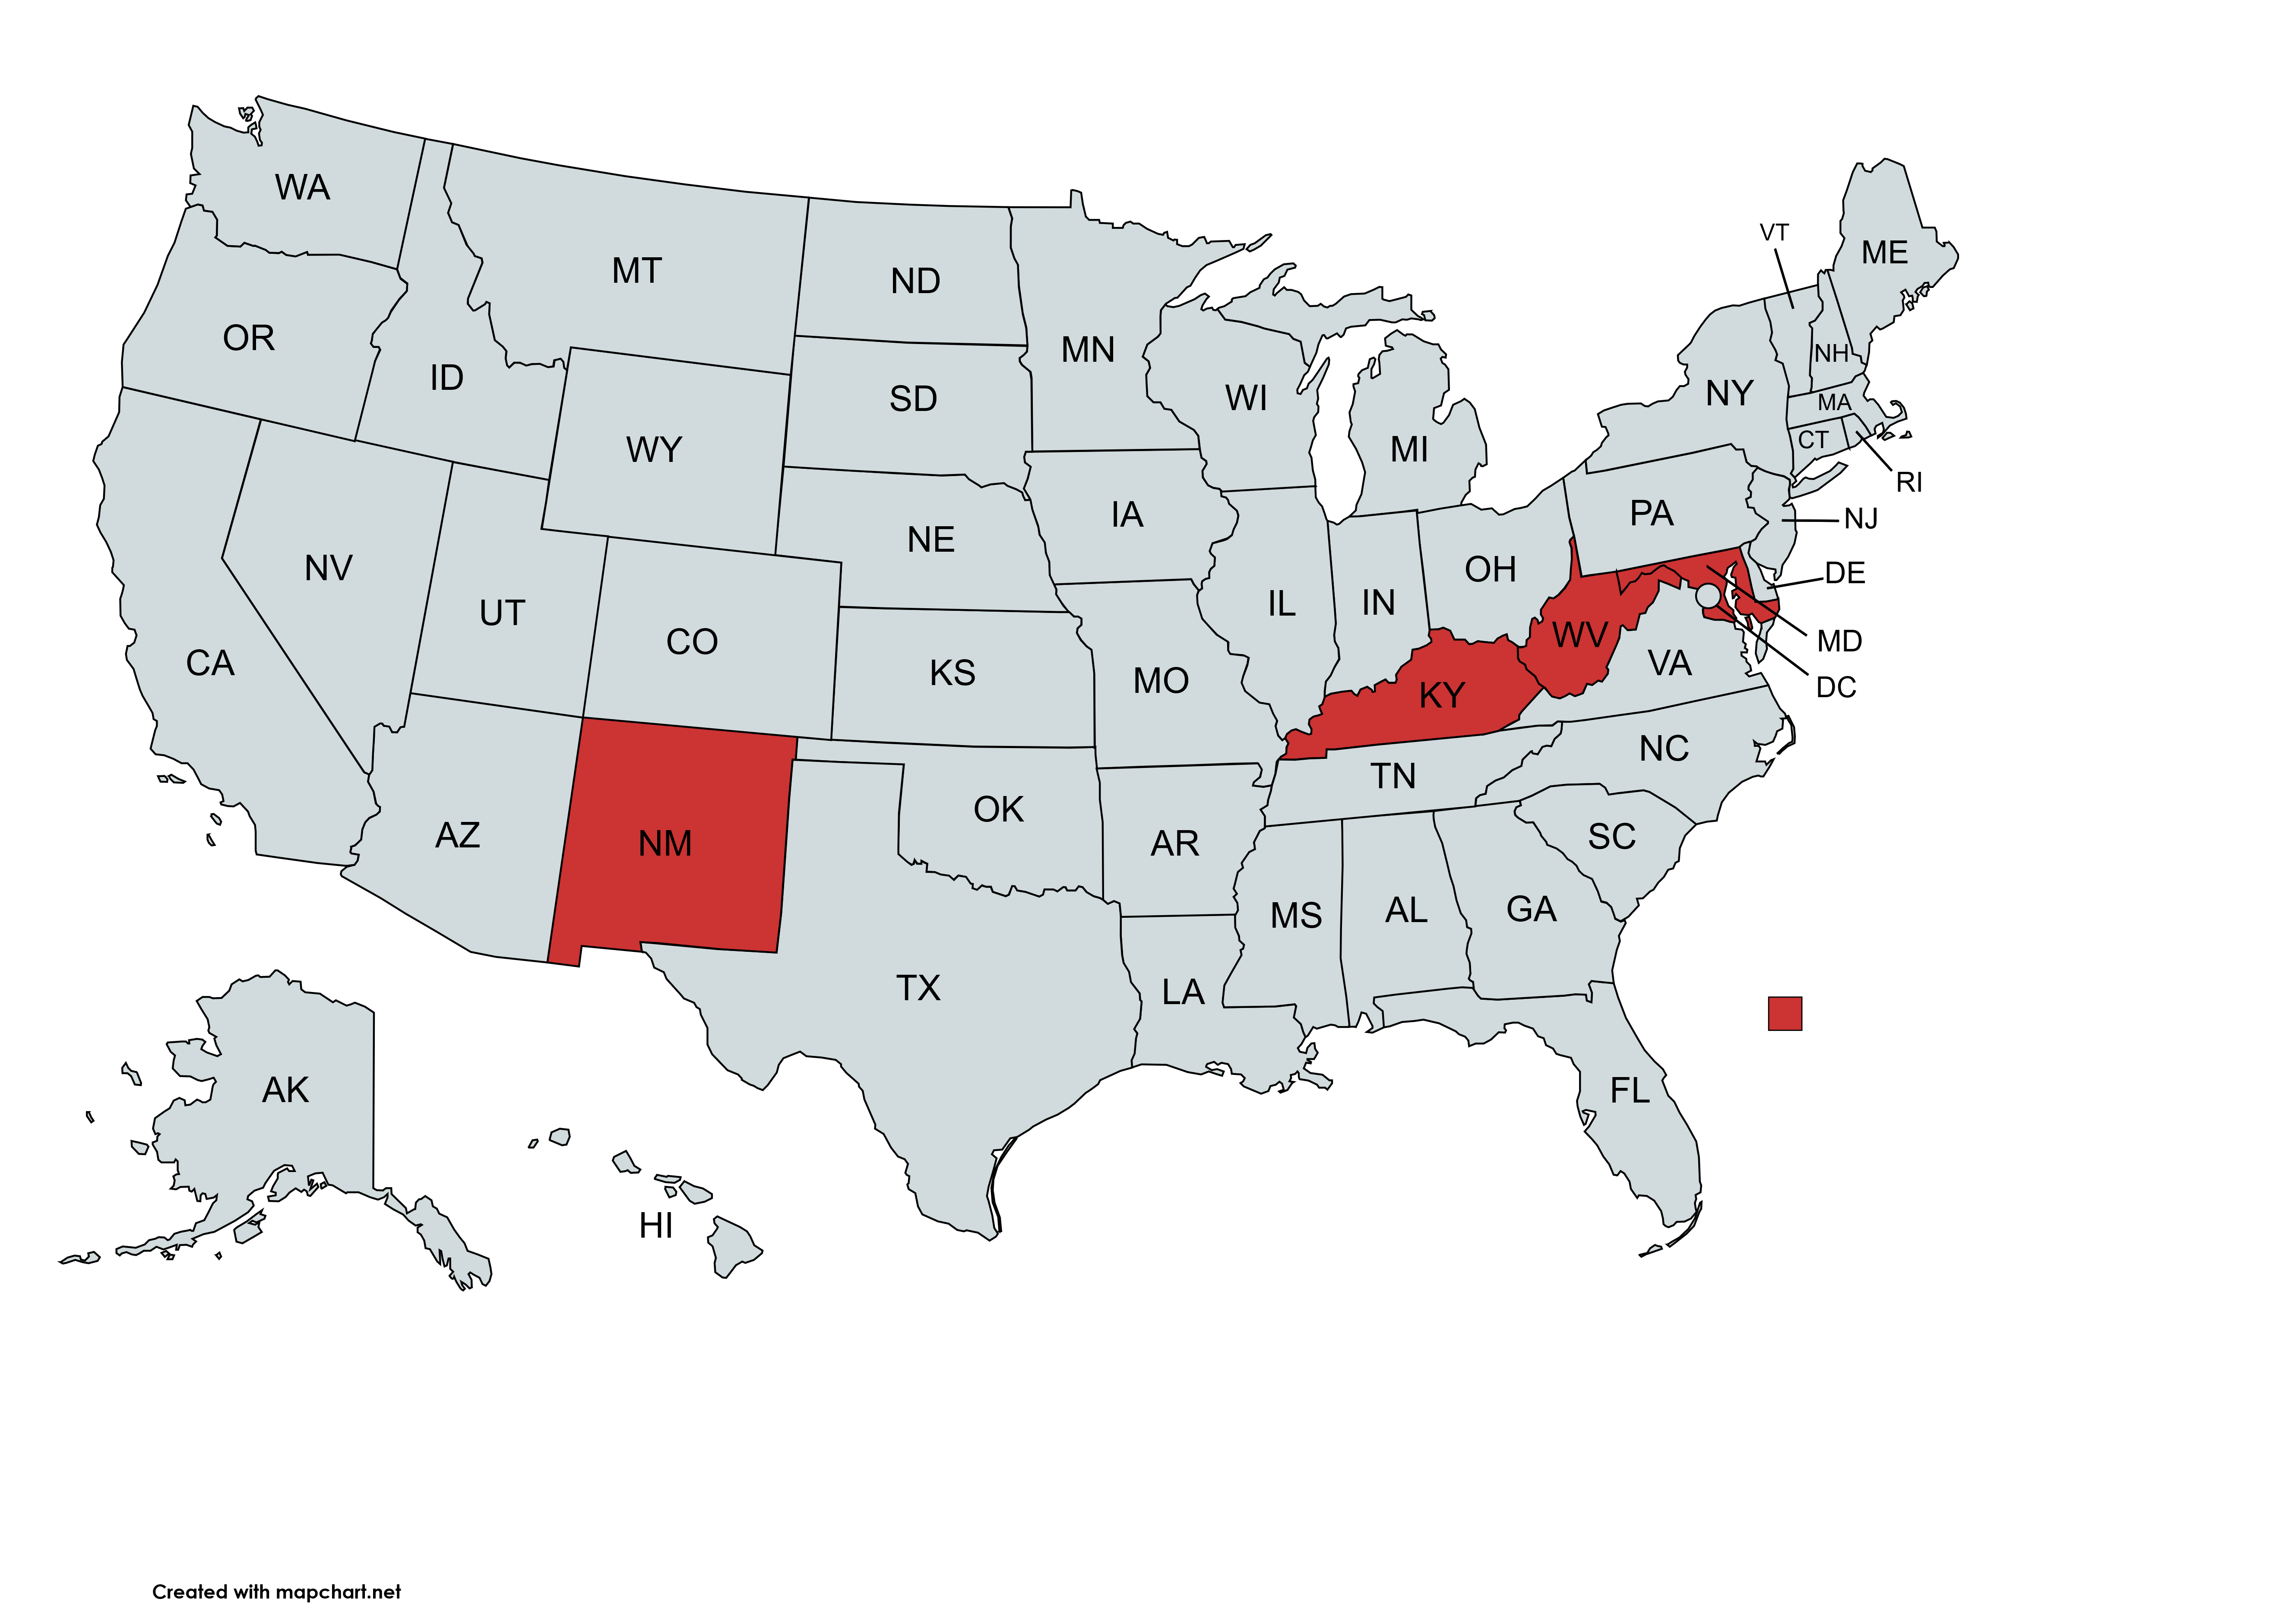

<AxesSubplot:>

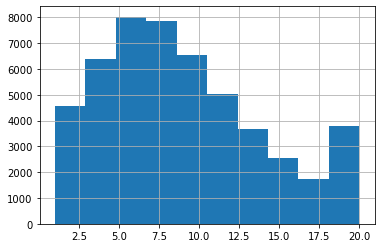

In [56]:
deathrate['Deathrate'].hist()

<AxesSubplot:xlabel='State'>

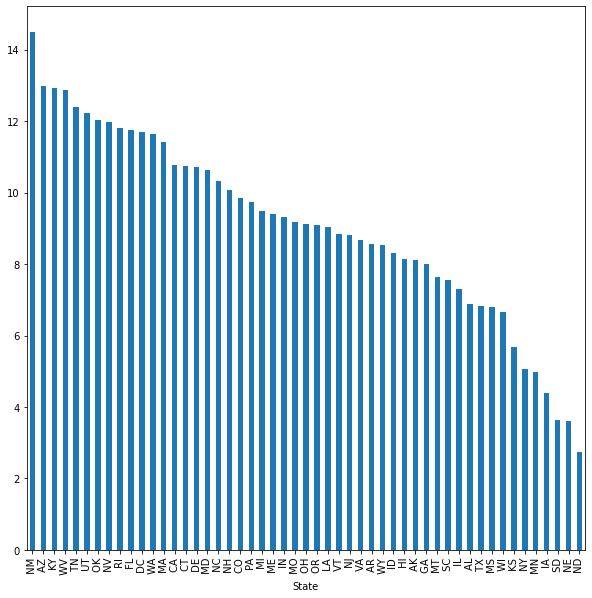

In [65]:
deathrate.groupby('State')['Deathrate'].mean().sort_values(ascending = False).plot.bar(figsize=(10, 10))

<AxesSubplot:xlabel='State'>

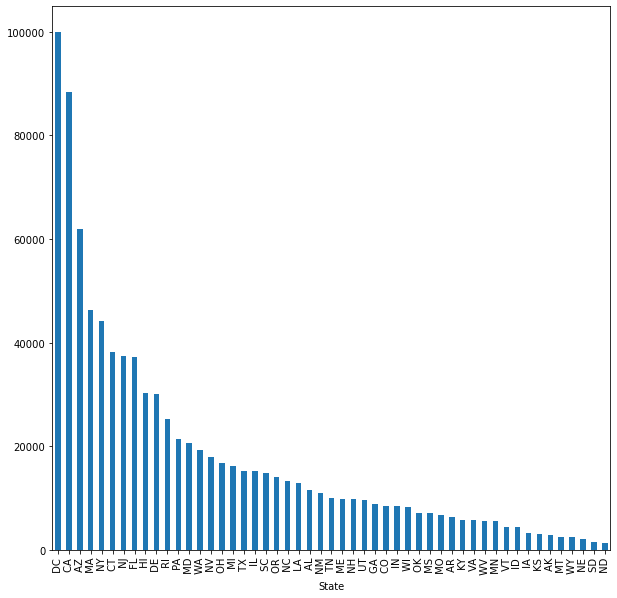

In [66]:
deathrate.groupby('State')['Poverty'].mean().sort_values(ascending = False).plot.bar(figsize=(10, 10))

The top poverty rate states don't seem to match the top death rate states.

In [104]:
deathrate_year = deathrate.groupby(['Year', 'State'])['Deathrate'].mean().reset_index()
deathrate_year.loc[deathrate_year.groupby('Year')['Deathrate'].idxmax()]

,Year,State,Deathrate
32,1999,NM,8.484848
83,2000,NM,9.151515
134,2001,NM,10.000000
185,2002,NM,10.909091
236,2003,NM,11.696970
287,2004,NM,12.454545
338,2005,NM,13.909091
389,2006,NM,14.575758
440,2007,NM,15.515152
491,2008,NM,16.393939


Every year, it seems like New Mexico has the highest death rate (except for 2013 where DC had the highest death rate).